In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import anndata as ad
import scanpy.external as sce
import decoupler as dc
# import scrublet as scr
# import muon as mu
#from vpolo.alevin import parser # to parse alevin output
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import statsmodels.stats.multitest as multi

import re

seed = 0
np.random.seed(seed)
%matplotlib inline

import matplotlib as mpl
mpl.rcParams['figure.facecolor'] = (1,1,1,1)
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

In [2]:
sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=80, color_map='viridis', transparent=False, frameon=False)  # low dpi (dots per inch) yields small inline figures

import matplotlib as mpl
# 2 lines below solved the facecolor problem.
# mpl.rcParams['figure.facecolor'] = 'white'
mpl.rcParams['figure.facecolor'] = (1,1,1,1)
sc.settings.autosave = True
sc.logging.print_header()

version = '250501_mouseBAM_Dennis'
# input_table = '../data/231009_PBMC_HH514.csv'

results_file = '../scanpy/{}/res.h5ad'.format(version)
results_file_mu = '../scanpy/{}/res.h5mu'.format(version)
results_file_cellxgene = '../scanpy/{}/res.cxg.h5ad'.format(version)

import os
os.makedirs('../scanpy/{}'.format(version), exist_ok=True)

sc.settings.figdir = '../scanpy/{}/graph'.format(version)
sc.settings.cachedir = '../scanpy/{}/cache'.format(version)
# %config InlineBackend.figure_format = 'retina'

import os
os.makedirs('../scanpy/{}'.format(version), exist_ok=True)
os.makedirs(sc.settings.figdir, exist_ok=True)

2025-05-05 15:24:31.927589: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-05 15:24:33.440973: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-05 15:24:33.775071: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-05 15:24:33.901686: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-05 15:24:34.742258: I tensorflow/core/platform/cpu_feature_guar

scanpy==1.10.2 anndata==0.10.9 umap==0.5.6 numpy==1.26.4 scipy==1.13.0 pandas==2.2.3 scikit-learn==1.5.1 statsmodels==0.14.2 igraph==0.11.6 pynndescent==0.5.13


In [3]:
adata = sc.read_h5ad('/home/yy693/pi_hafler/ASAP/data/250501_RawCounts_MI2BAC_BAC_Young_Old_forYoshiDavid_QDW.h5ad')

In [14]:
adata.obs['sample'] = adata.obs['genotype']
adata.obs['genotype'] = adata.obs['sample'].str.split('_').str.get(0)
adata.obs['age'] = adata.obs['sample'].str.split('_').str.get(1)

In [15]:
adata

AnnData object with n_obs × n_vars = 7447 × 32285
    obs: 'celltype_fine', 'genotype', 'sample', 'age'
    uns: 'celltype_fine_colors', 'genotype_colors', 'hvg', 'neighbors', 'pca', 'tsne', 'umap'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    obsp: 'connectivities', 'distances'

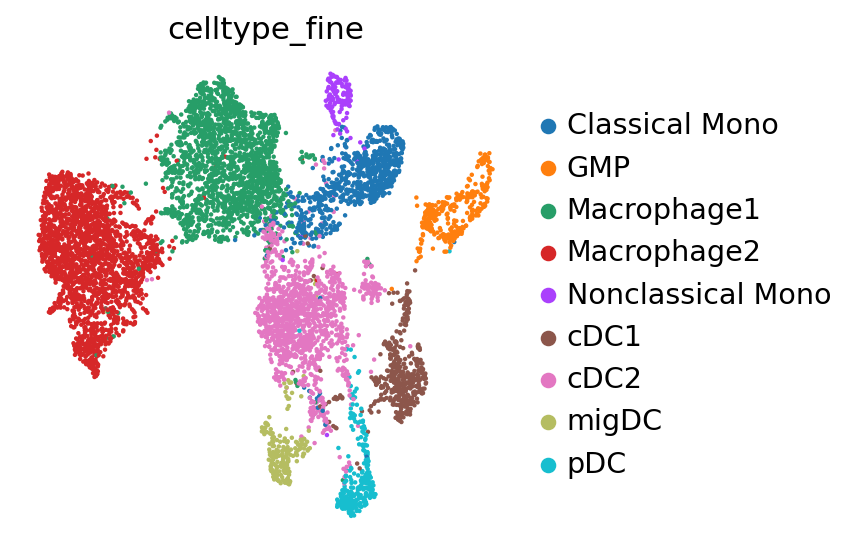

In [66]:
sc.pl.umap(adata, color=['celltype_fine'], frameon=False, save='_groups.pdf')

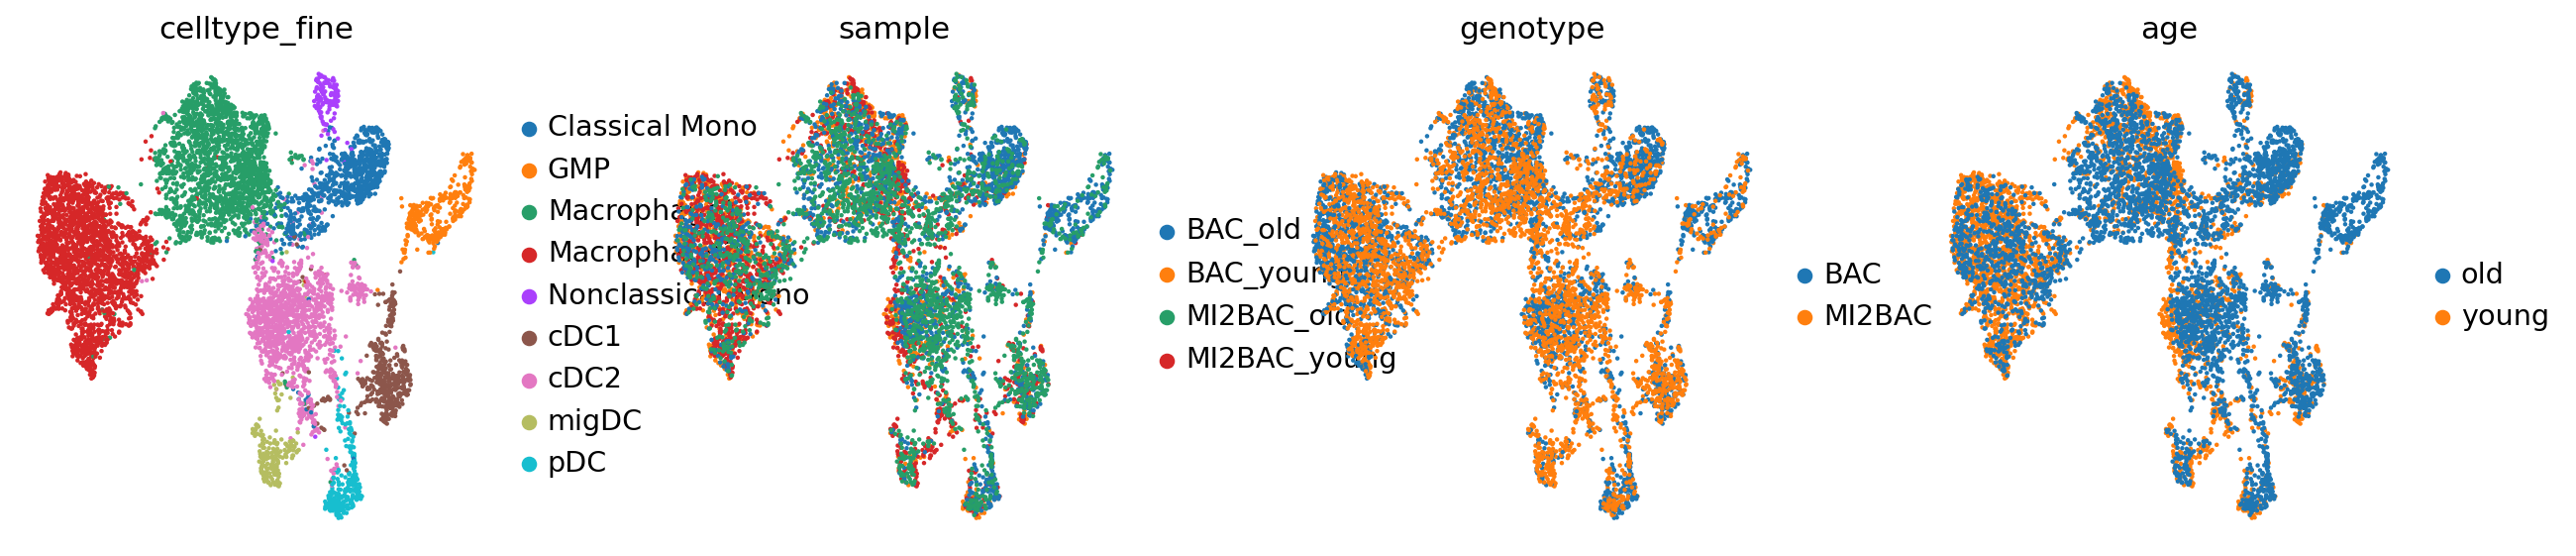

In [16]:
sc.pl.umap(adata, color=['celltype_fine', 'sample', 'genotype', 'age'], frameon=False, save='_groups.pdf')

In [17]:
adata.layers['counts'] = adata.X

In [18]:
# Normalizing to median total counts
sc.pp.normalize_total(adata)
# Logarithmize the data
sc.pp.log1p(adata)

normalizing counts per cell
    finished (0:00:00)


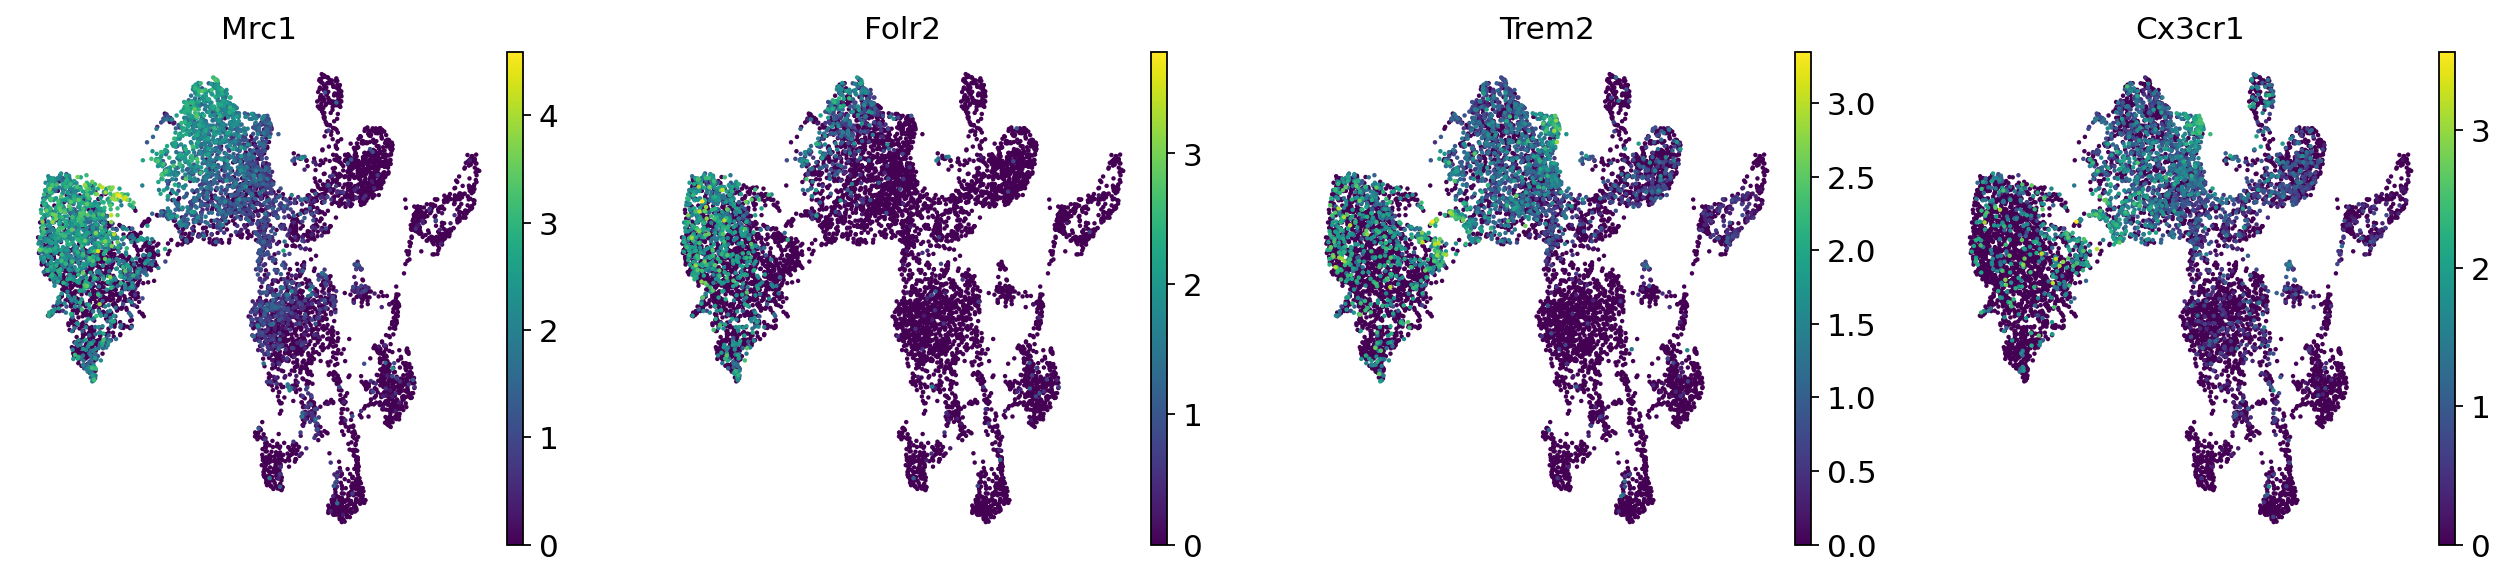

In [19]:
sc.pl.umap(adata, color=['Mrc1','Folr2', 'Trem2', 'Cx3cr1'])

In [20]:
adata.write(f'../scanpy/{version}/{version}.cxg.h5ad')

## post analysis

In [4]:
adata = sc.read_h5ad(f'../scanpy/{version}/{version}.cxg.h5ad')

/gpfs/gibbs/project/hafler/yy693/conda_envs/scanpy1.10.2/lib/python3.11/site-packages/anndata/_core/anndata.py:1145: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


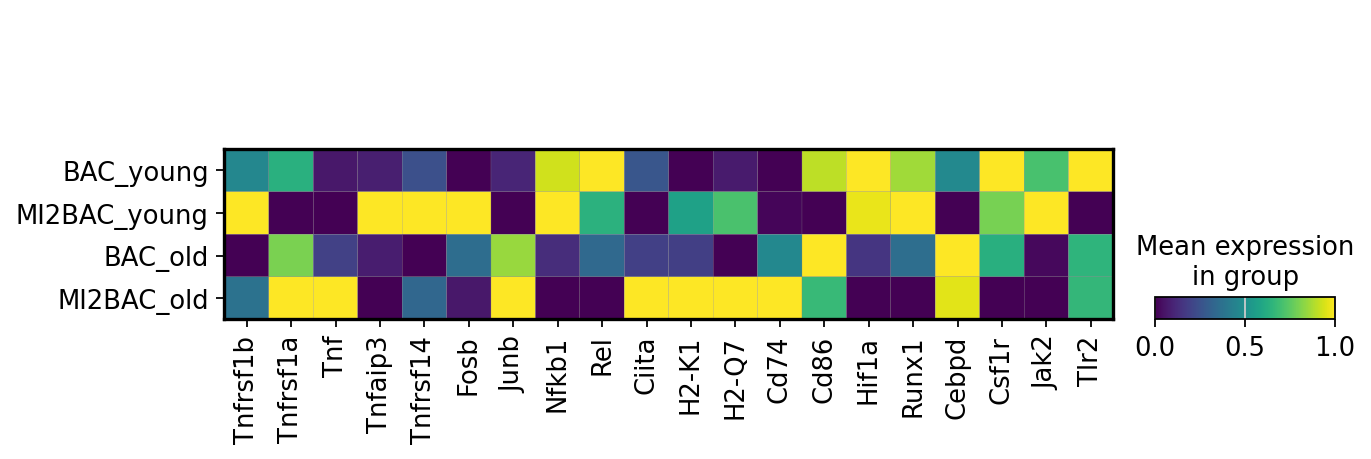

In [61]:
sc.pl.matrixplot(adata[adata.obs['celltype_fine'].isin(['Macrophage1', 'Macrophage2']
)], var_names=['Tnfrsf1b', 'Tnfrsf1a', 'Tnf', 'Tnfaip3', 'Tnfrsf14', 'Fosb', 'Junb', 
'Nfkb1', 'Rel', 'Ciita', 'H2-K1', 'H2-Q7', 'Cd74', 'Cd86', 'Hif1a', 'Runx1', 'Cebpd', 'Csf1r', 'Jak2','Tlr2'], 
groupby='sample', cmap='viridis', standard_scale='var', categories_order=['BAC_young', 'MI2BAC_young', 'BAC_old', 'MI2BAC_old',])